In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## functions
def removeOutliers(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    
    iqr = q3 - q1
    
    intervalo_sup = q3 + (1.5 * iqr)
    intervalo_inf = q1 - (1.5 * iqr)
    return intervalo_sup, intervalo_inf

# Importar base
---

In [3]:
df = pd.read_csv('../data/bootcamp-solicitacoescredito.csv')
df.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [4]:
df.isnull().sum() / df.shape[0]

numero_solicitacao             0.000000
razaoSocial                    0.000000
nomeFantasia                   0.000000
cnpjSemTraco                   0.000000
maiorAtraso                    0.000000
margemBrutaAcumulada           0.000000
percentualProtestos            0.166945
primeiraCompra                 0.011813
prazoMedioRecebimentoVendas    0.000000
titulosEmAberto                0.000000
valorSolicitado                0.000000
status                         0.000000
definicaoRisco                 0.000000
diferencaPercentualRisco       0.000000
percentualRisco                0.000000
dashboardCorrelacao            0.000000
valorAprovado                  0.156469
dataAprovadoEmComite           0.937813
periodoBalanco                 0.472529
ativoCirculante                0.472529
passivoCirculante              0.472529
totalAtivo                     0.472529
totalPatrimonioLiquido         0.472529
endividamento                  0.472529
duplicatasAReceber             0.472529


# Primeiro passo: Visualizar as features
---

<AxesSubplot: title={'center': 'custos'}, xlabel='custos', ylabel='Count'>

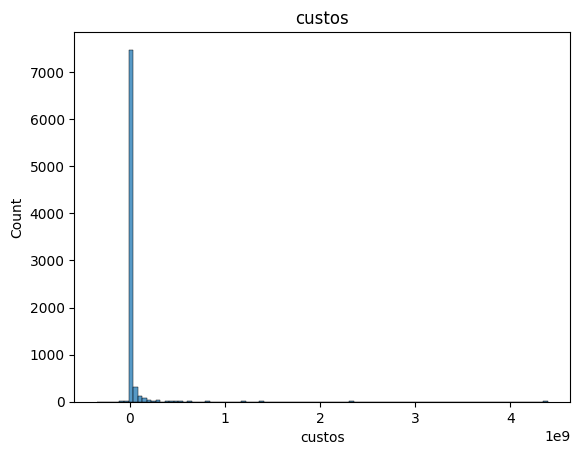

In [5]:
plt.title('custos')
sns.histplot(data=df, x='custos', bins=100)

<AxesSubplot: title={'center': 'total Ativo'}, xlabel='totalAtivo', ylabel='Count'>

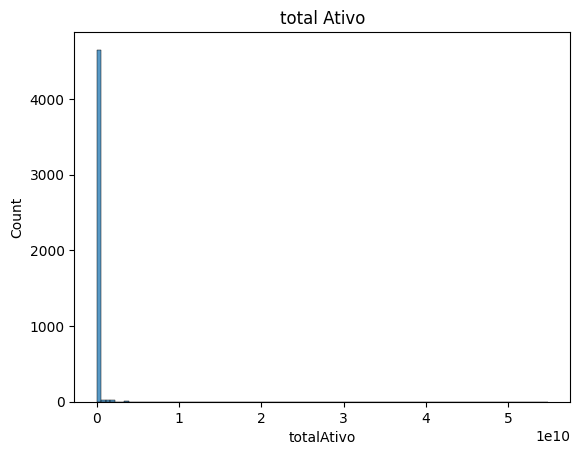

In [6]:
plt.title('total Ativo')
sns.histplot(data=df, x='totalAtivo', bins=100)

<AxesSubplot: title={'center': 'Ativo Circulante'}, xlabel='ativoCirculante', ylabel='Count'>

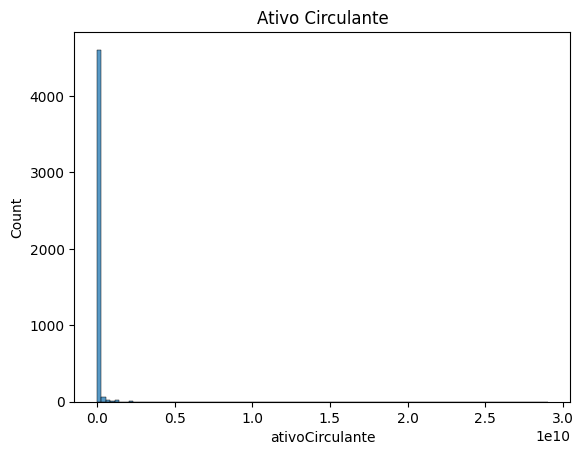

In [7]:
plt.title('Ativo Circulante')
sns.histplot(data=df, x='ativoCirculante', bins=100)

<AxesSubplot: title={'center': 'Passivo Circulante'}, xlabel='passivoCirculante', ylabel='Count'>

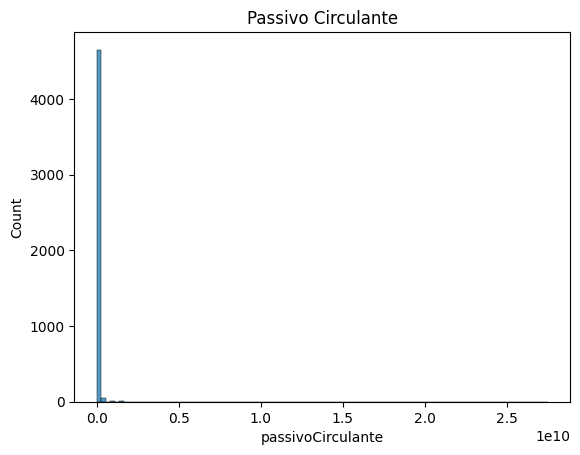

In [8]:
plt.title('Passivo Circulante')
sns.histplot(data=df, x='passivoCirculante', bins=100)

<AxesSubplot: title={'center': 'Margem Bruta Acumulada'}, xlabel='margemBrutaAcumulada', ylabel='Count'>

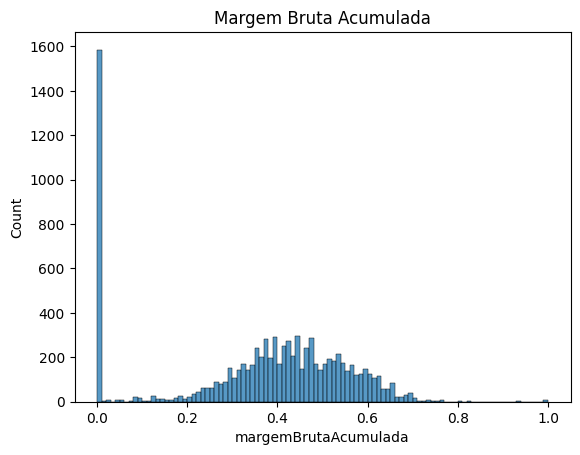

In [9]:
plt.title('Margem Bruta Acumulada')
sns.histplot(data=df, x='margemBrutaAcumulada', bins=100)

<AxesSubplot: title={'center': 'Maior Atraso'}, xlabel='maiorAtraso', ylabel='Count'>

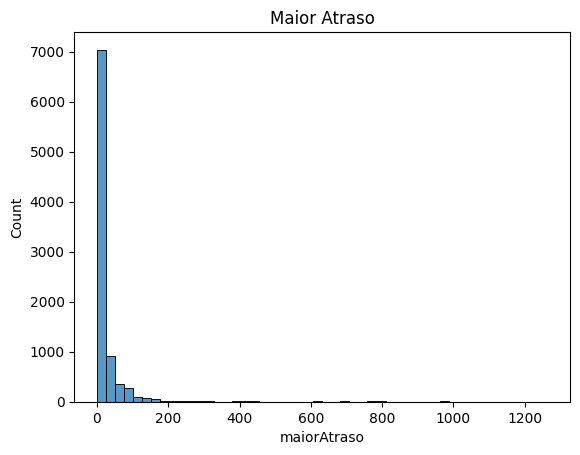

In [10]:
plt.title('Maior Atraso')
sns.histplot(data=df, x='maiorAtraso', bins=50)

<AxesSubplot: title={'center': 'Percentual Protestos'}, xlabel='percentualProtestos', ylabel='Count'>

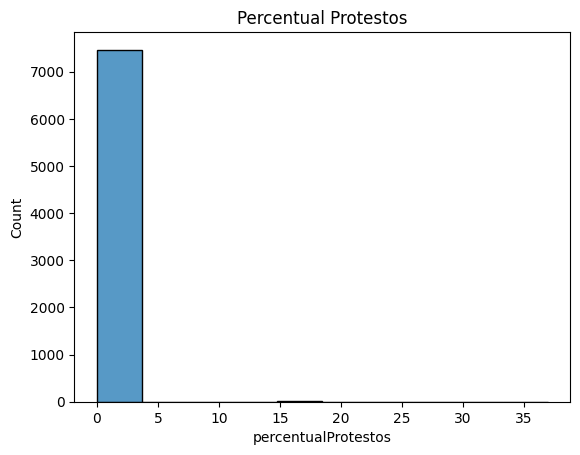

In [11]:
plt.title('Percentual Protestos')
sns.histplot(data=df, x='percentualProtestos', bins=10)

<AxesSubplot: title={'center': 'Prazo Médio Recebimento de Vendas'}, xlabel='prazoMedioRecebimentoVendas', ylabel='Count'>

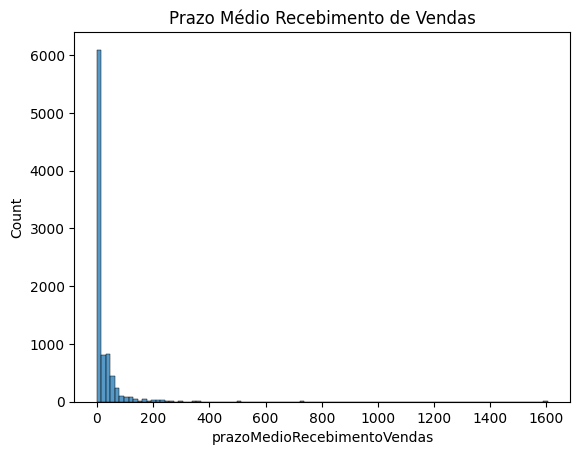

In [12]:
plt.title('Prazo Médio Recebimento de Vendas')
sns.histplot(data=df, x='prazoMedioRecebimentoVendas', bins=100)

<AxesSubplot: title={'center': 'Titulos em Aberto'}, xlabel='titulosEmAberto', ylabel='Count'>

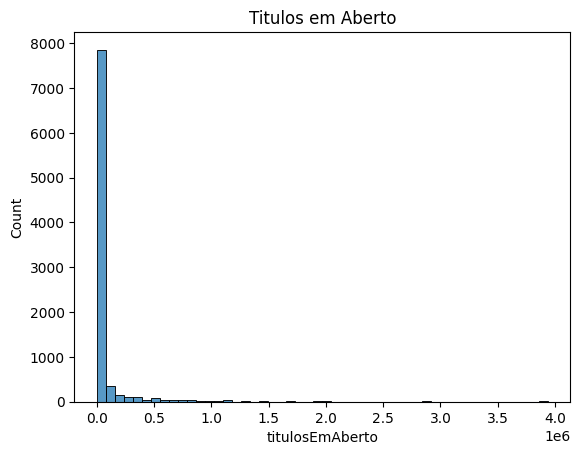

In [13]:
plt.title('Titulos em Aberto')
sns.histplot(data=df, x='titulosEmAberto', bins=50)

<AxesSubplot: title={'center': 'Diferença Percentual de Risco'}, xlabel='diferencaPercentualRisco', ylabel='Count'>

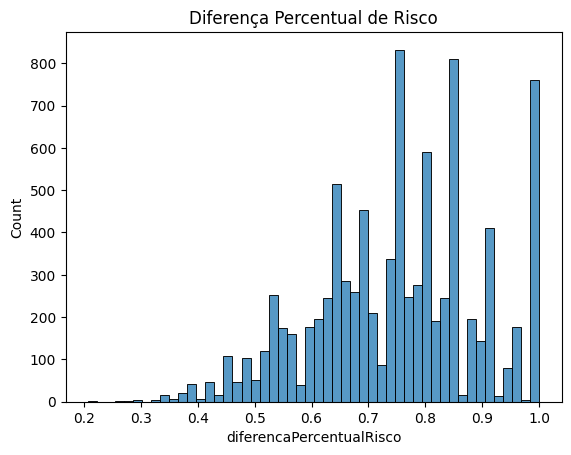

In [14]:
plt.title('Diferença Percentual de Risco')
sns.histplot(data=df, x='diferencaPercentualRisco', bins=50)

<AxesSubplot: title={'center': 'Percentual Risco'}, xlabel='percentualRisco', ylabel='Count'>

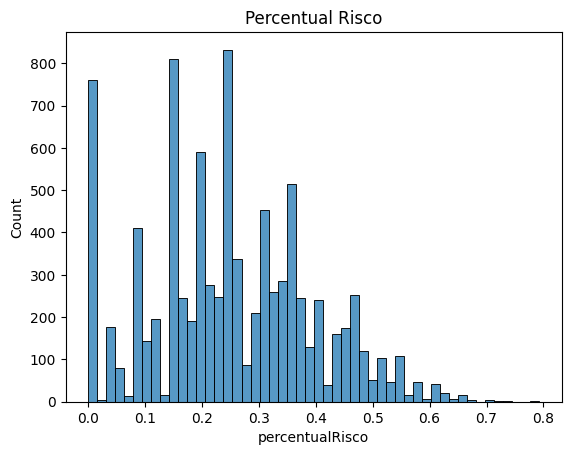

In [15]:
plt.title('Percentual Risco')
sns.histplot(data=df, x='percentualRisco', bins=50)

<AxesSubplot: title={'center': 'Dashboard Correlação'}, xlabel='dashboardCorrelacao', ylabel='Count'>

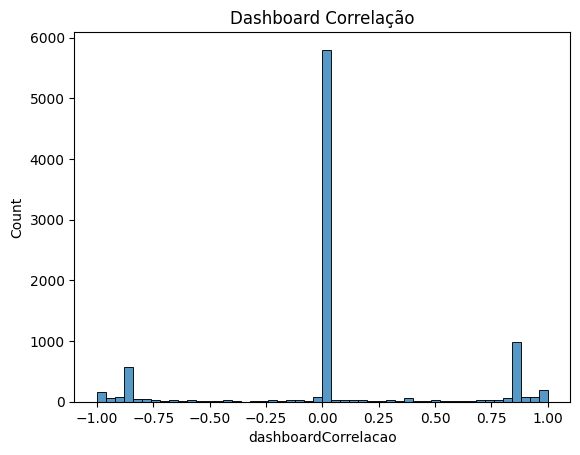

In [16]:
plt.title('Dashboard Correlação')
sns.histplot(data=df, x='dashboardCorrelacao', bins=50)

<AxesSubplot: title={'center': 'Ativo Circulante'}, xlabel='ativoCirculante', ylabel='Count'>

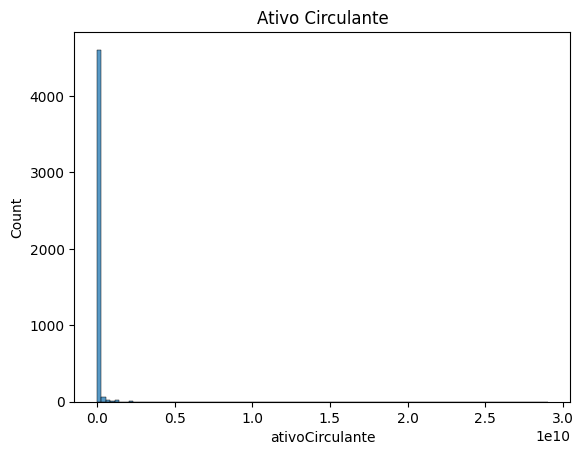

In [17]:
plt.title('Ativo Circulante')
sns.histplot(data=df, x='ativoCirculante', bins=100)

<AxesSubplot: title={'center': 'scorePontualidade'}, xlabel='scorePontualidade', ylabel='Count'>

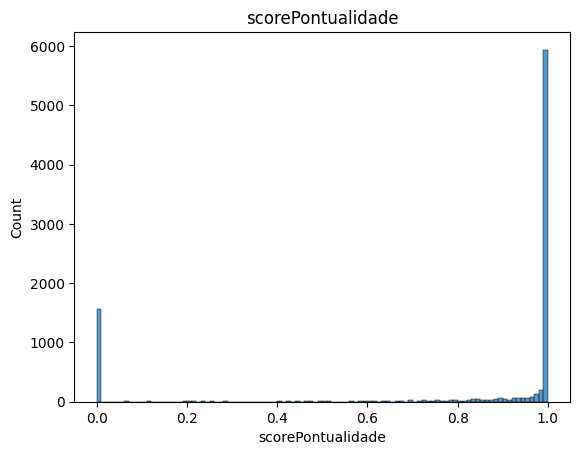

In [18]:
plt.title('scorePontualidade')
sns.histplot(data=df, x='scorePontualidade', bins=100)

## Correlação com patrimônio liquido
---

In [19]:
intervalo_sup, intervalo_inf = removeOutliers(df['totalPatrimonioLiquido'])
intervalo_sup_titulos, intervalo_inf_titulos = removeOutliers(df['titulosEmAberto'])
df_plot = df[(df['totalPatrimonioLiquido'] < intervalo_sup) & (df['totalPatrimonioLiquido'] > intervalo_inf)].copy()
df_plot = df_plot[(df_plot['titulosEmAberto'] < intervalo_sup_titulos) & (df_plot['titulosEmAberto'] > intervalo_inf_titulos)].copy()

<AxesSubplot: xlabel='titulosEmAberto', ylabel='totalPatrimonioLiquido'>

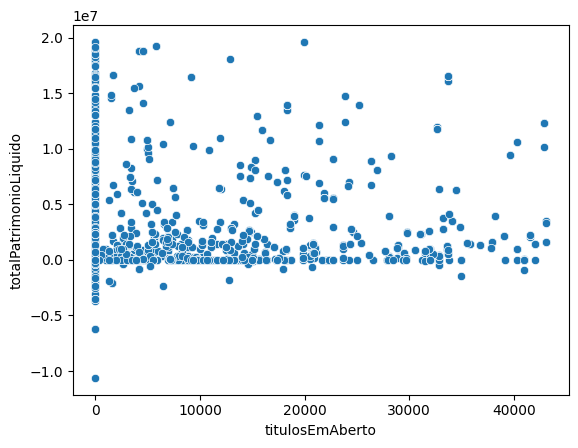

In [20]:
sns.scatterplot(data=df_plot, x='titulosEmAberto', y='totalPatrimonioLiquido')

In [21]:
intervalo_sup_valorSolicitado, intervalo_inf_valorSolicitado = removeOutliers(df['valorSolicitado'])
df_plot = df[(df['totalPatrimonioLiquido'] < intervalo_sup) & (df['totalPatrimonioLiquido'] > intervalo_inf)].copy()
df_plot = df_plot[(df_plot['valorSolicitado'] < intervalo_sup_valorSolicitado) & (df_plot['valorSolicitado'] > intervalo_inf_valorSolicitado)].copy()

<AxesSubplot: xlabel='valorSolicitado', ylabel='totalPatrimonioLiquido'>

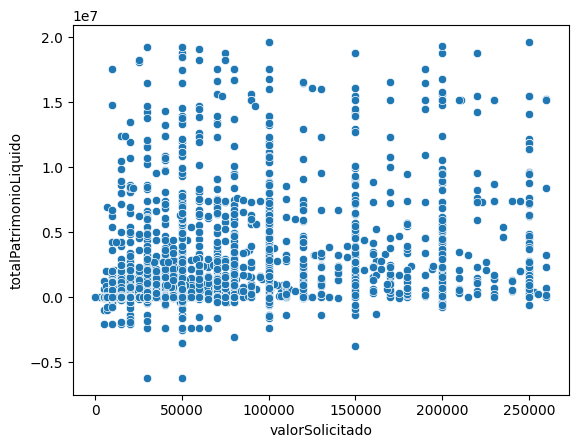

In [22]:
sns.scatterplot(data=df_plot, x='valorSolicitado', y='totalPatrimonioLiquido')

In [23]:
intervalo_sup_maiorAtraso, intervalo_inf_maiorAtraso = removeOutliers(df['maiorAtraso'])
df_plot = df[(df['totalPatrimonioLiquido'] < intervalo_sup) & (df['totalPatrimonioLiquido'] > intervalo_inf)].copy()
df_plot = df_plot[(df_plot['maiorAtraso'] < intervalo_sup_maiorAtraso) & (df_plot['maiorAtraso'] > intervalo_inf_maiorAtraso)].copy()

<AxesSubplot: xlabel='maiorAtraso', ylabel='totalPatrimonioLiquido'>

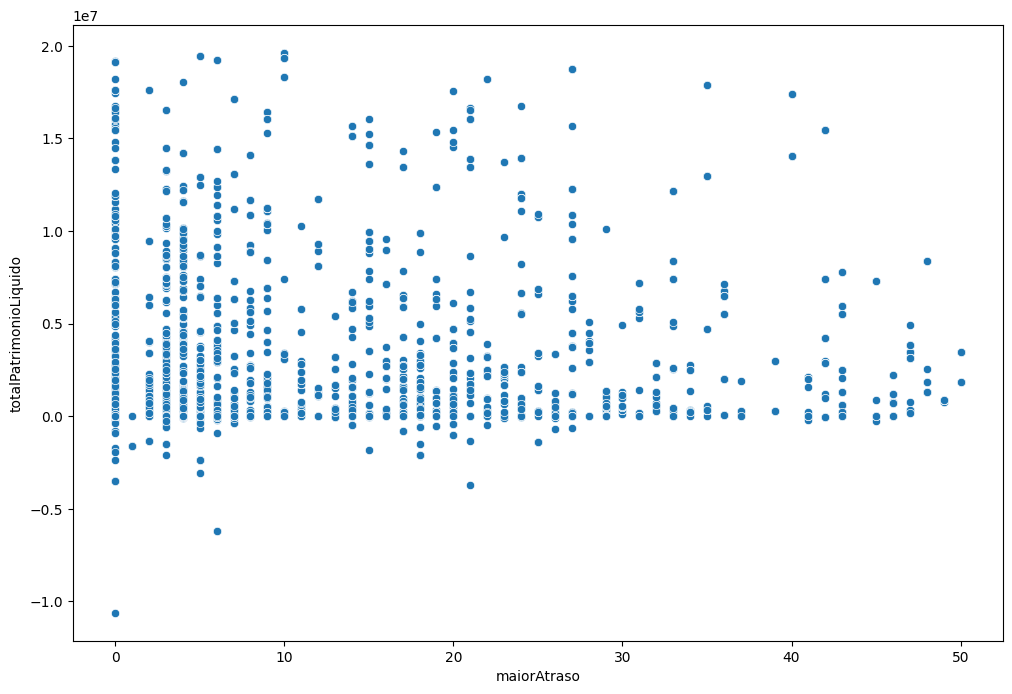

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_plot, x='maiorAtraso', y='totalPatrimonioLiquido')

In [25]:
## Remoção de colunas com muitos nulos
df.drop(['dataAprovadoNivelAnalista',
         'dataAprovadoEmComite'], axis=1, inplace=True)

In [26]:
print(f"Quantidade de cnpjs COM nulos {df['cnpjSemTraco'].nunique()}")
print(f"Quantidade de cnpjs SEM nulos {df.dropna(subset=['totalAtivo', 'totalPatrimonioLiquido'])['cnpjSemTraco'].nunique()}")

Quantidade de cnpjs COM nulos 2829
Quantidade de cnpjs SEM nulos 1523


In [27]:
df_cluster = df[['totalAtivo', 'totalPatrimonioLiquido', 'ativoCirculante', 'passivoCirculante', 'endividamento', 'maiorAtraso', 'titulosEmAberto']].dropna().copy()
df_cluster

,totalAtivo,totalPatrimonioLiquido,ativoCirculante,passivoCirculante,endividamento,maiorAtraso,titulosEmAberto
4,25793410.0,14544378.0,14758917.0,12149031.0,3039112.0,20,1486.95
7,19415777.0,7519758.0,17801610.0,2538069.0,0.0,4,208980.00
8,39455945.0,25612746.0,36827690.0,13843198.0,0.0,43,6432.00
10,3609498.0,2538787.0,2127907.0,704245.0,366465.0,7,0.00
11,5595689.0,-720844.0,5369982.0,6118711.0,1715000.0,26,0.00
...,...,...,...,...,...,...,...
8958,20290799.0,1893943.0,20070708.0,18164050.0,74793.0,4,6804.00
8959,5633038.0,905806.0,4943835.0,4025065.0,1257000.0,18,90290.90
8960,0.0,0.0,0.0,0.0,0.0,0,0.00
8961,40876769.0,25603650.0,38305921.0,15063464.0,46198.0,64,1276462.66


<AxesSubplot: >

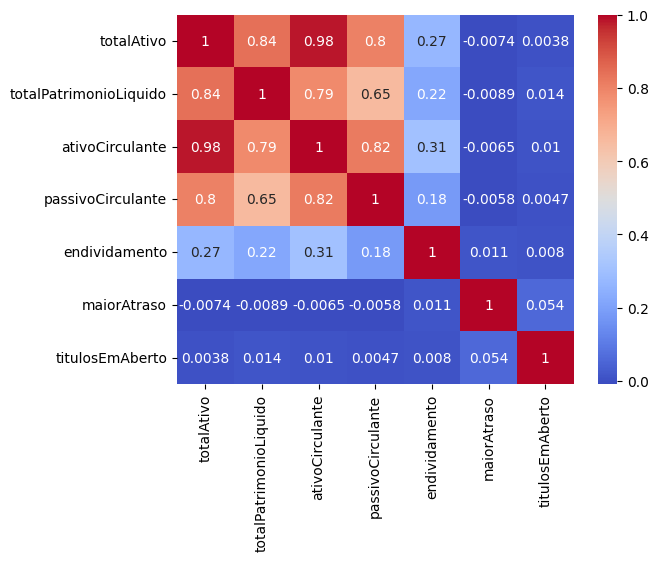

In [28]:
sns.heatmap(df_cluster.corr(), cmap='coolwarm', annot=True)

## Analisando variáveis correlacionadas
- O objetivo é conseguir as features que descriminem melhor variáveis como totalAtivo, totalPatrimonioLiquido, para conseguir seguimentar os grupos com o máximo de registros
---

In [29]:
df.columns

Index(['numero_solicitacao', 'razaoSocial', 'nomeFantasia', 'cnpjSemTraco',
       'maiorAtraso', 'margemBrutaAcumulada', 'percentualProtestos',
       'primeiraCompra', 'prazoMedioRecebimentoVendas', 'titulosEmAberto',
       'valorSolicitado', 'status', 'definicaoRisco',
       'diferencaPercentualRisco', 'percentualRisco', 'dashboardCorrelacao',
       'valorAprovado', 'periodoBalanco', 'ativoCirculante',
       'passivoCirculante', 'totalAtivo', 'totalPatrimonioLiquido',
       'endividamento', 'duplicatasAReceber', 'estoque', 'faturamentoBruto',
       'margemBruta', 'periodoDemonstrativoEmMeses', 'custos', 'anoFundacao',
       'intervaloFundacao', 'capitalSocial', 'restricoes', 'empresa_MeEppMei',
       'scorePontualidade', 'limiteEmpresaAnaliseCredito'],
      dtype='object')

In [30]:
df.isnull().sum() / df.shape[0]

numero_solicitacao             0.000000
razaoSocial                    0.000000
nomeFantasia                   0.000000
cnpjSemTraco                   0.000000
maiorAtraso                    0.000000
margemBrutaAcumulada           0.000000
percentualProtestos            0.166945
primeiraCompra                 0.011813
prazoMedioRecebimentoVendas    0.000000
titulosEmAberto                0.000000
valorSolicitado                0.000000
status                         0.000000
definicaoRisco                 0.000000
diferencaPercentualRisco       0.000000
percentualRisco                0.000000
dashboardCorrelacao            0.000000
valorAprovado                  0.156469
periodoBalanco                 0.472529
ativoCirculante                0.472529
passivoCirculante              0.472529
totalAtivo                     0.472529
totalPatrimonioLiquido         0.472529
endividamento                  0.472529
duplicatasAReceber             0.472529
estoque                        0.472529


In [31]:
import numpy as np
df['intervaloFundacao'] = df['intervaloFundacao'].map({'De 0 a 5 anos': 0, 'De 6 a 10 anos': 1, 'De 11 a 16 anos': 2, 'Acima de 17 anos': 3})

<AxesSubplot: >

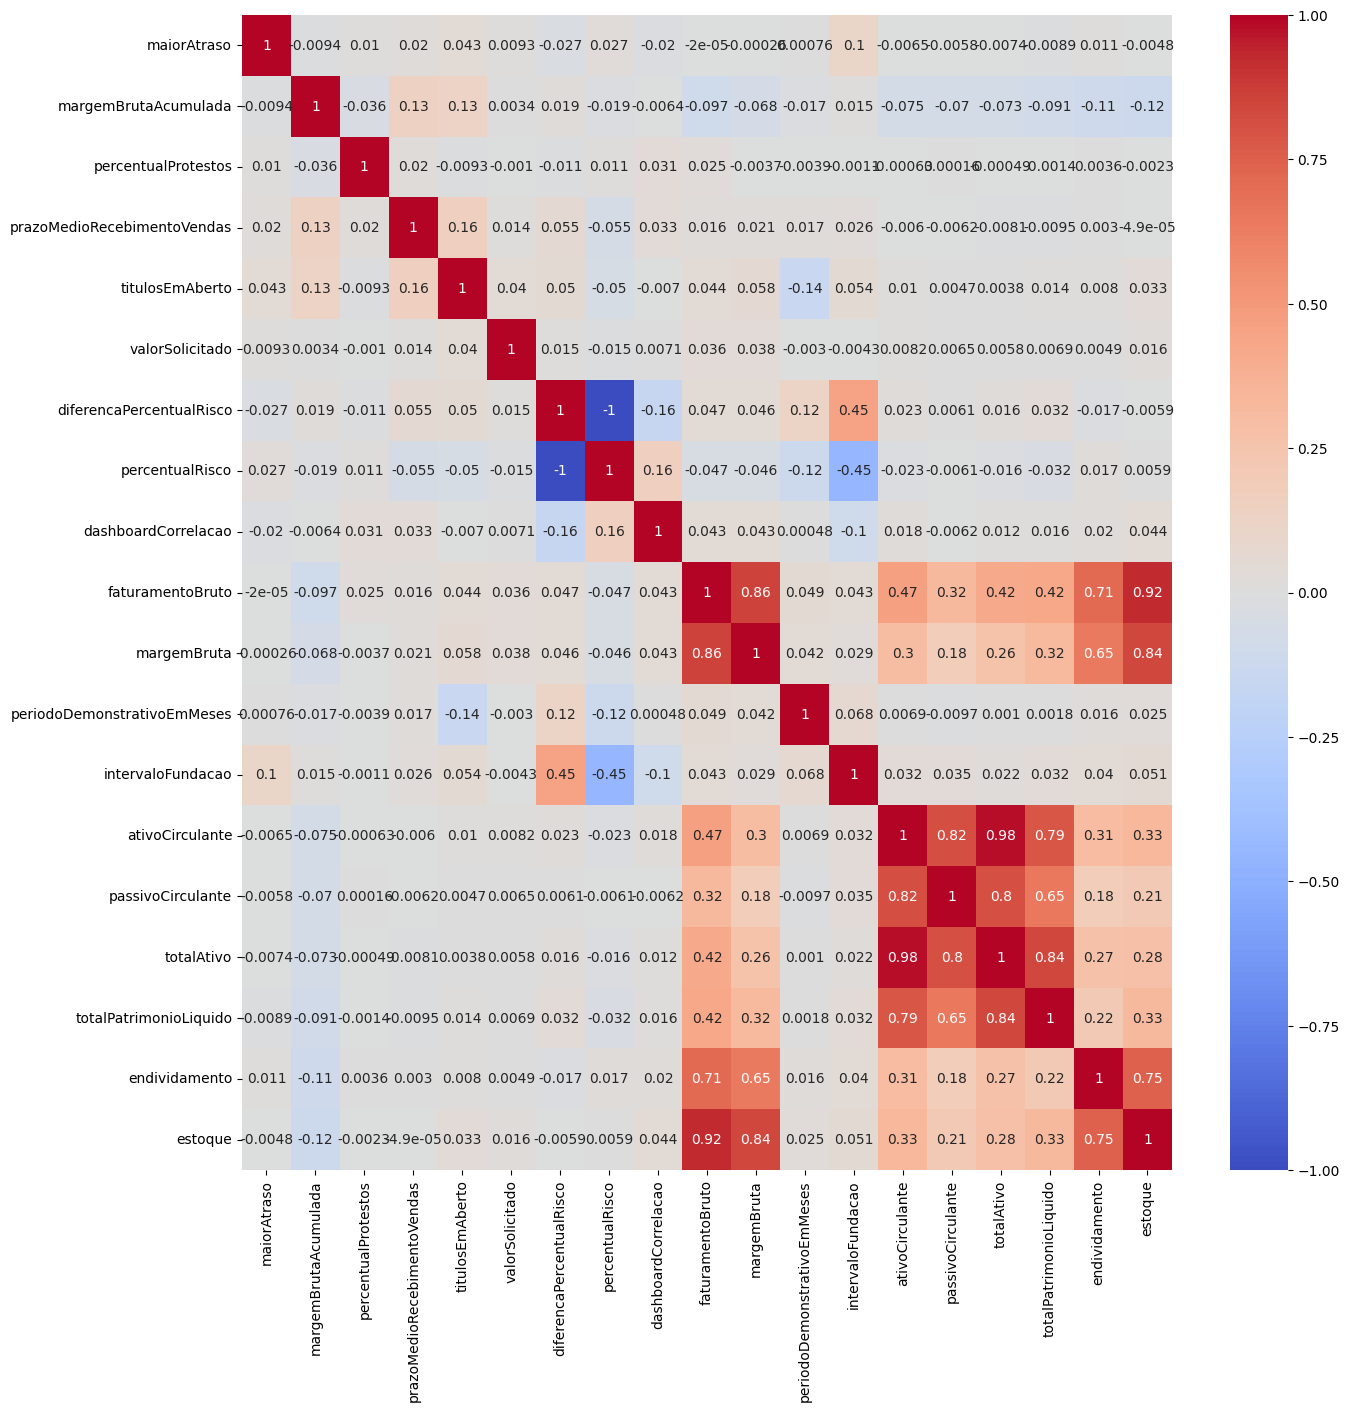

In [32]:
correlation_features = ['maiorAtraso', 'margemBrutaAcumulada',
                        'percentualProtestos', 'prazoMedioRecebimentoVendas',
                        'titulosEmAberto', 'valorSolicitado',
                        'diferencaPercentualRisco', 'percentualRisco',
                        'dashboardCorrelacao', 'faturamentoBruto',
                        'margemBruta', 'periodoDemonstrativoEmMeses',
                        'intervaloFundacao','periodoBalanco',
                        'ativoCirculante','passivoCirculante',
                        'totalAtivo','totalPatrimonioLiquido',
                        'endividamento', 'estoque']

df_corr = df[correlation_features].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, cmap='coolwarm', annot=True)

In [33]:
## Removendo outliers das colunas que me interessam
# ['margemBrutaAcumulada', 'faturamentoBruto', 'margemBruta'] -> Até então essas 3 colunas parecem interessantes
# Minha hipótese é que se eu usar variáveis correlacionadas com o totalAtivo, endividamento, estoque, etc... Conseguirei 
# Features que descriminam bem os grupos ($$)

features_of_interest = ['ativoCirculante','passivoCirculante',
                        'totalAtivo','totalPatrimonioLiquido',
                        'endividamento', 'estoque']

dict_limits = {}

for col in features_of_interest:
    limits = removeOutliers(df[col])
    dict_limits[col] = limits

print(dict_limits)

df_correlation = df.copy()
for key, value in dict_limits.items():
    df_correlation = df_correlation[(df_correlation[key] < value[0]) & (df_correlation[key] > value[1])]

{'ativoCirculante': (39546537.5, -22307786.5), 'passivoCirculante': (18348960.0, -10716624.0), 'totalAtivo': (46343995.0, -26126813.0), 'totalPatrimonioLiquido': (19742964.5, -11473151.5), 'endividamento': (1854125.0, -1112475.0), 'estoque': (13477668.5, -7812543.5)}


<AxesSubplot: >

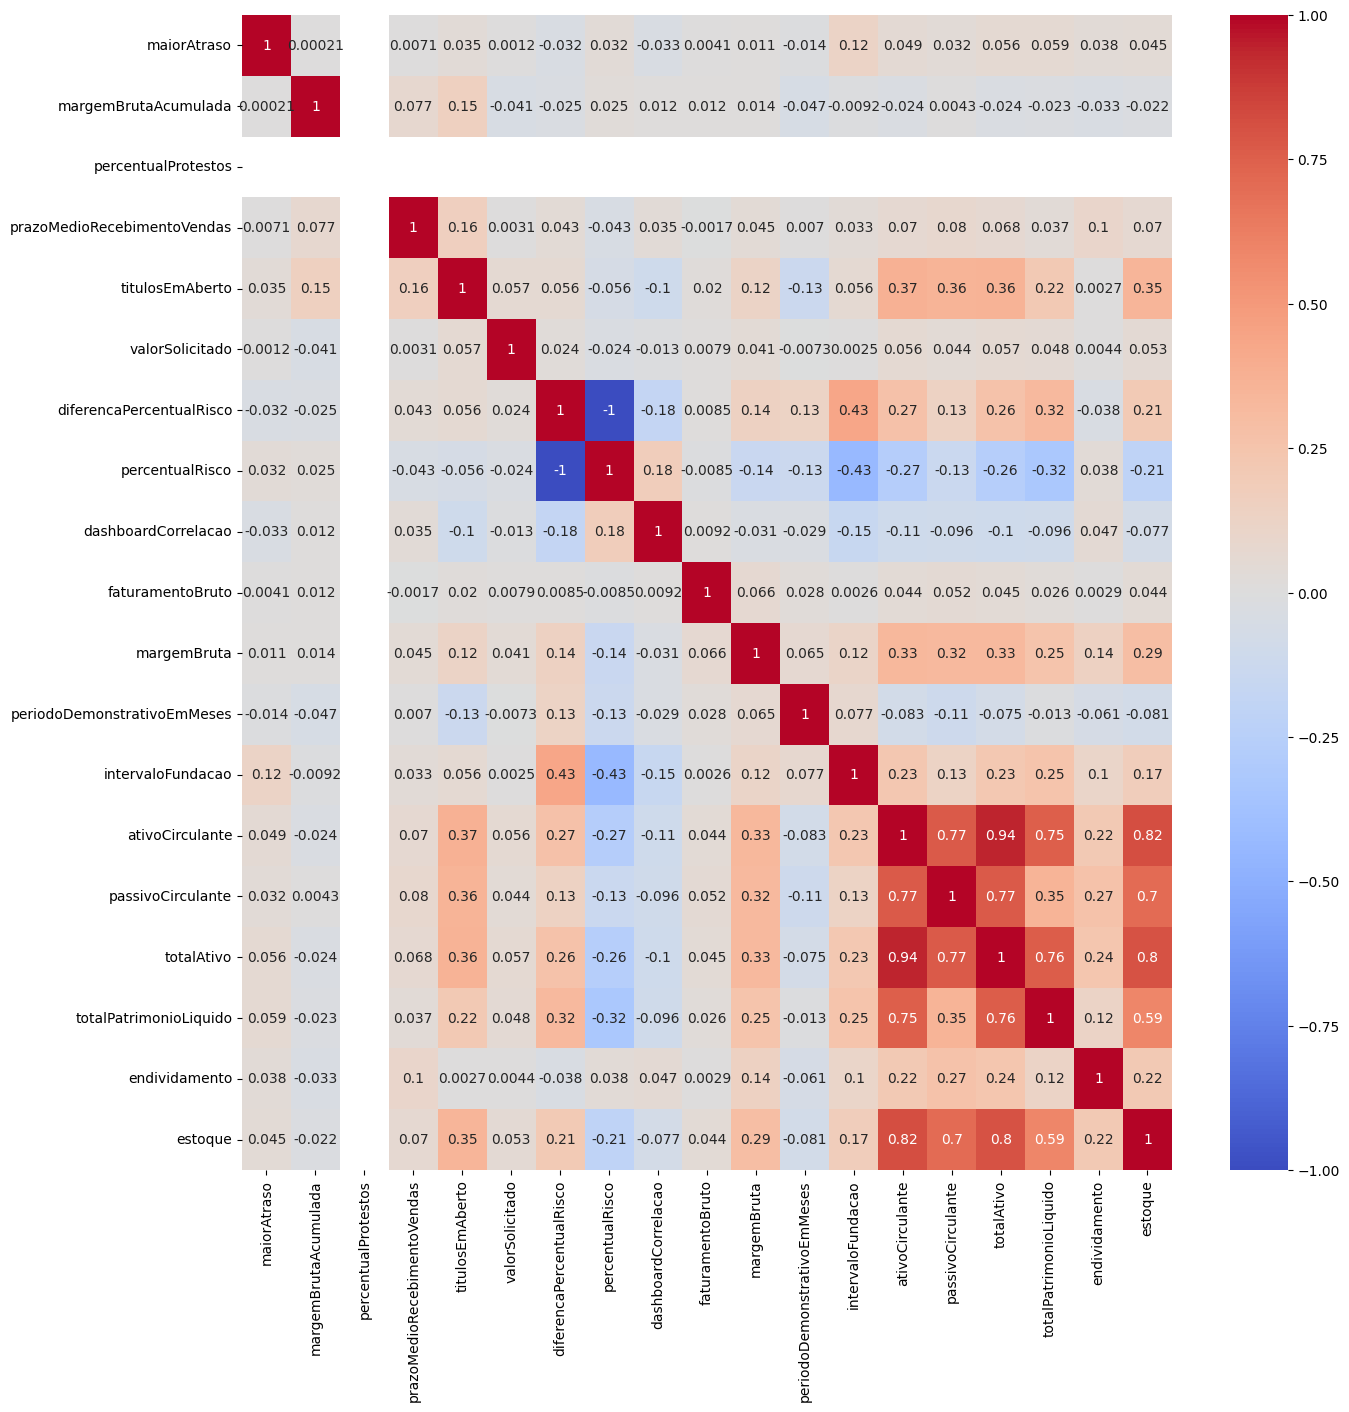

In [34]:
df_corr_v2 = df_correlation[correlation_features].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr_v2, cmap='coolwarm', annot=True)

## Teste de quantidade de clusters
---

In [35]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
se = StandardScaler()
df_cluster = df[['cnpjSemTraco',
                 'numero_solicitacao',
                 'margemBrutaAcumulada',
                 'faturamentoBruto',
                 'margemBruta',
                 'percentualRisco',
                 'percentualRisco',
                 'intervaloFundacao']].dropna()

df_cluster_v2 = se.fit_transform(df_cluster.drop(['cnpjSemTraco', 'numero_solicitacao'], axis=1))
# SALVAR OS NUMEROS REFERENTES A INERCIA E SILHUETA DO MODELO

inercia = []
silhueta = {}

for i in range(2, 11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(df_cluster_v2)
    
    inercia.append(k_means.inertia_)
    
    silhueta[i] = silhouette_score(df_cluster_v2, labels=k_means.labels_, metric='euclidean')

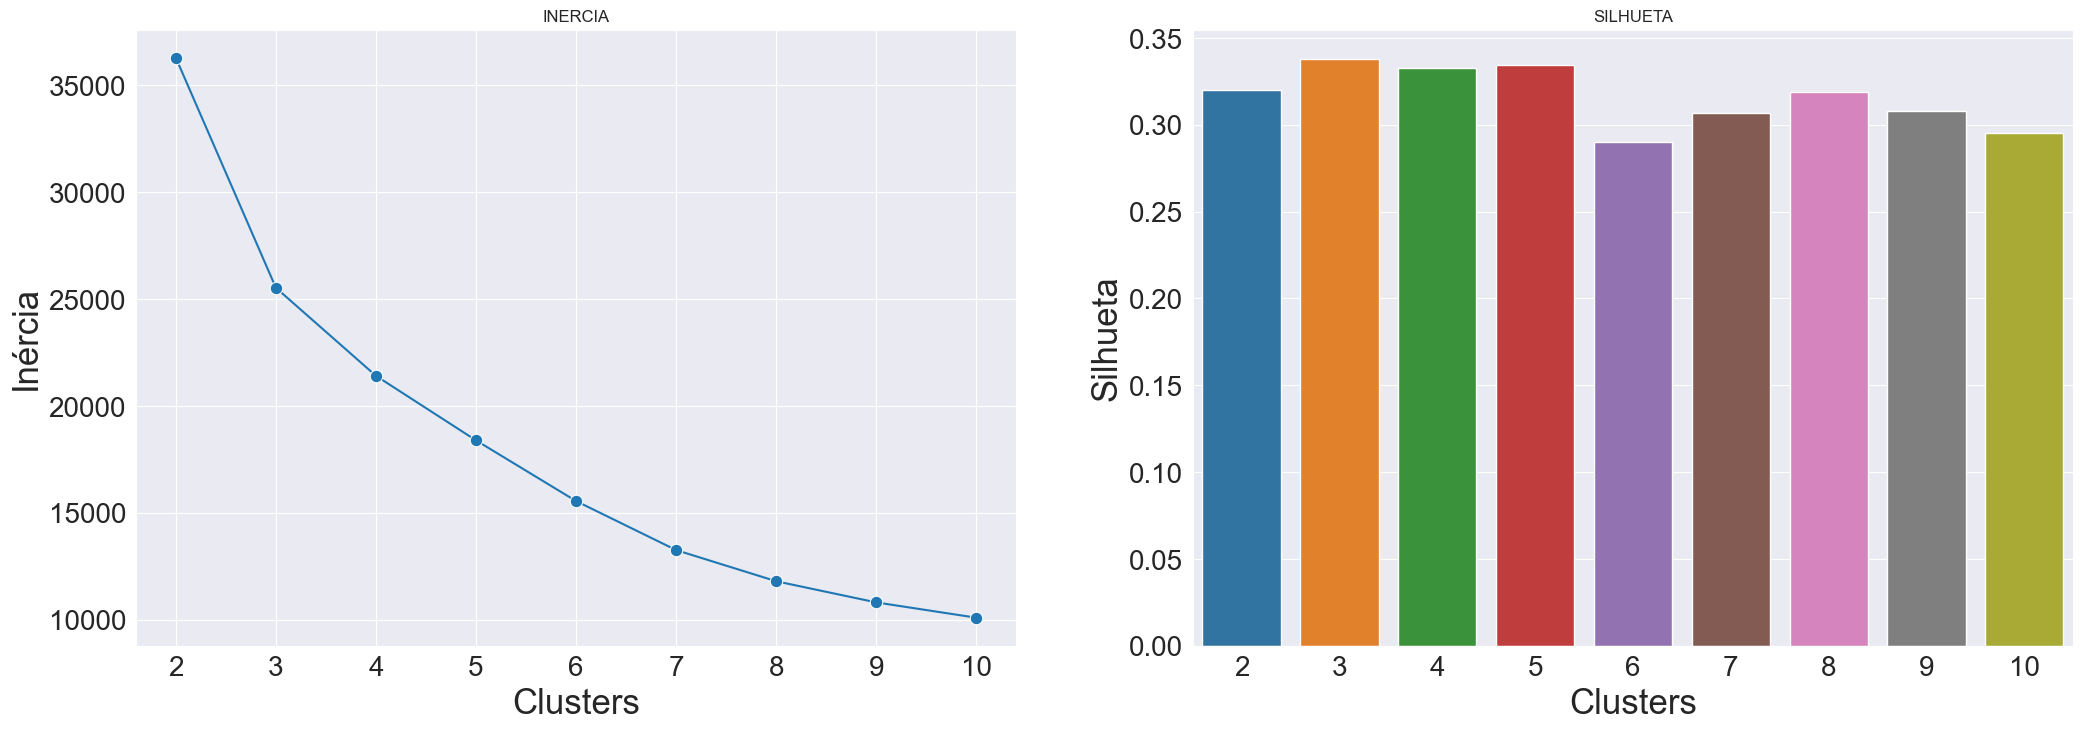

In [36]:
plt.figure(figsize=(25, 8))
sns.set_style("darkgrid")

plt.subplot(1, 2, 1)
plt.title('INERCIA')
sns.lineplot(x=range(2, 11), y=inercia, marker='o', markersize=9)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Clusters', fontsize=25)
plt.ylabel('Inércia', fontsize=25)

plt.subplot(1, 2, 2)
plt.title('SILHUETA')
sns.barplot(x=list(silhueta.keys()), y=list(silhueta.values()))
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Clusters', fontsize=25)
plt.ylabel('Silhueta', fontsize=25)

plt.show()

## UTILIZAREI 3 CLUSTERS

In [37]:
k_means = KMeans(n_clusters=3, random_state=42)
preds = k_means.fit_predict(df_cluster_v2)

df_cluster['group'] = preds
df_cluster

,cnpjSemTraco,numero_solicitacao,margemBrutaAcumulada,faturamentoBruto,margemBruta,percentualRisco,percentualRisco,intervaloFundacao,group
0,KEBE17609492220843,1,0.252448,1766880.0,0.0,0.283019,0.283019,3.0,0
2,GCVQ28531614261293,3,0.624777,2814940.0,0.0,0.283019,0.283019,1.0,1
3,KJND32266018316396,4,0.000000,1285274.0,0.0,0.603774,0.603774,1.0,1
4,CGQN15826802440348,5,0.454088,40779757.0,81459809.0,0.169811,0.169811,3.0,0
5,KAYS53232027306925,6,0.000000,918476.0,0.0,0.377358,0.377358,1.0,1
...,...,...,...,...,...,...,...,...,...
8958,XIIJ66670040144884,9031,0.536739,133280394.0,44612644.0,0.250000,0.250000,2.0,0
8959,JXCH36268697453955,9032,0.374573,4887005.0,2322234.0,0.142857,0.142857,2.0,0
8960,IPFS70635894073808,9033,0.462250,5392166.0,246578.0,0.267857,0.267857,0.0,1
8961,IFOK15843566708440,9034,0.426652,119702196.0,38587967.0,0.142857,0.142857,3.0,0


In [38]:
df_cluster['group'].value_counts()

0    4764
1    3397
2      62
Name: group, dtype: int64

In [39]:
df.shape

(8973, 36)

In [40]:
df_cluster_merge = df_cluster[['cnpjSemTraco', 'numero_solicitacao', 'group']].reset_index(drop=True)

In [41]:
df_groups = df.merge(df_cluster_merge, on=['cnpjSemTraco', 'numero_solicitacao'])
df_groups.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,group
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,3.0,90000.0,False,True,1.0,43200.0,0
1,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,1.0,20000.0,False,True,1.0,4320.0,1
2,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,1.0,30000.0,False,True,0.0,5920.0,1
3,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,3.0,75000.0,False,False,1.0,89000.0,0
4,6,Liam Jackson,Gerard Gordon,KAYS53232027306925,0,0.000000,NaN,2019-06-28T10:25:57,0,0.00,...,12.0,0.0,2011.0,1.0,15000.0,False,True,0.0,38400.0,1


In [42]:
df_groups.groupby('group').agg({'ativoCirculante': np.median,
                                'passivoCirculante': np.median,
                                'totalPatrimonioLiquido': np.median,
                                'totalAtivo': np.median,
                                'endividamento': np.median,
                                'estoque': np.median})

,ativoCirculante,passivoCirculante,totalPatrimonioLiquido,totalAtivo,endividamento,estoque
group,,,,,,
0,6.563632e+06,1878599.0,2725460.0,7.602796e+06,0.0,1754461.0
1,1.407528e+06,551497.5,337687.5,1.615900e+06,1500.0,364757.0
2,1.118886e+09,535065853.0,800377000.0,1.768742e+09,65648000.0,506297202.0


# Explorando os grupos agora
## Grupo 0
---

In [43]:
group_0 = df_groups[df_groups['group'] == 0].copy()

group_0.describe()

,numero_solicitacao,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,...,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,scorePontualidade,limiteEmpresaAnaliseCredito,group
count,4764.000000,4764.000000,4764.000000,4055.000000,4764.000000,4.764000e+03,4.764000e+03,4764.000000,4764.000000,4764.000000,...,4.764000e+03,4.764000e+03,4764.000000,4.764000e+03,4764.000000,4764.000000,4.764000e+03,4764.000000,4.764000e+03,4764.0
mean,4741.692065,24.673594,0.373133,0.009109,24.742653,8.088273e+04,9.854388e+05,0.814688,0.185312,-0.011316,...,4.343057e+07,1.192867e+07,10.633081,2.239130e+07,2001.519521,2.158270,9.140687e+06,0.818814,2.883107e+06,0.0
std,2554.625289,66.305044,0.196248,0.342087,55.633780,2.665836e+05,2.923216e+07,0.072674,0.072674,0.475508,...,1.357060e+08,4.115775e+07,2.886859,8.832007e+07,23.351261,0.953536,7.990129e+07,0.365148,3.025023e+07,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+02,0.642857,0.000000,-0.999990,...,0.000000e+00,-2.693832e+08,1.000000,-3.466338e+08,1000.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0
25%,2579.750000,3.000000,0.296874,0.000000,0.000000,0.000000e+00,3.000000e+04,0.750000,0.142857,0.000000,...,2.378391e+06,0.000000e+00,12.000000,0.000000e+00,1996.000000,1.000000,6.000000e+04,0.938417,1.620000e+04,0.0
50%,4747.000000,5.000000,0.412026,0.000000,0.000000,0.000000e+00,5.000000e+04,0.803571,0.196429,0.000000,...,6.870828e+06,8.694960e+05,12.000000,9.193000e+05,2004.000000,2.000000,2.000000e+05,1.000000,1.089000e+05,0.0
75%,7017.500000,21.000000,0.511755,0.000000,35.000000,2.817507e+04,2.000000e+05,0.857143,0.250000,0.000000,...,2.737192e+07,7.030115e+06,12.000000,1.014214e+07,2010.000000,3.000000,8.090862e+05,1.000000,8.250360e+05,0.0
max,9036.000000,977.000000,1.000000,15.298110,1605.000000,2.836656e+06,1.500000e+09,1.000000,0.357143,0.999923,...,2.449766e+09,5.044761e+08,12.000000,1.501347e+09,2020.000000,3.000000,2.500000e+09,1.000000,1.974261e+09,0.0


In [44]:
percentage_of_nulls = group_0.isnull().sum() / group_0.shape[0]
percentage_of_nulls

numero_solicitacao             0.000000
razaoSocial                    0.000000
nomeFantasia                   0.000000
cnpjSemTraco                   0.000000
maiorAtraso                    0.000000
margemBrutaAcumulada           0.000000
percentualProtestos            0.148825
primeiraCompra                 0.010285
prazoMedioRecebimentoVendas    0.000000
titulosEmAberto                0.000000
valorSolicitado                0.000000
status                         0.000000
definicaoRisco                 0.000000
diferencaPercentualRisco       0.000000
percentualRisco                0.000000
dashboardCorrelacao            0.000000
valorAprovado                  0.050168
periodoBalanco                 0.329135
ativoCirculante                0.329135
passivoCirculante              0.329135
totalAtivo                     0.329135
totalPatrimonioLiquido         0.329135
endividamento                  0.329135
duplicatasAReceber             0.329135
estoque                        0.329135


In [45]:
def drop_columns_with_many_nulls(df):
    '''
    Colunas com mais de 30% de dados faltantes = drop
    df -> dataframe para ser ajustado
    '''
    percentage_of_nulls = df.isnull().sum() / df.shape[0]
    columns_to_drop = np.array(percentage_of_nulls[percentage_of_nulls > .3].index)
    adjusted_dataframe = df.drop(columns_to_drop, axis=1)
    return adjusted_dataframe

def initial_column_selection(df):
    '''
    ``Helper function``
    Dropa colunas que não serão utilizadas
    '''
    adjusted_df = drop_columns_with_many_nulls(df)
    
    ## Também não quero utilizar datas na minha regressão
    unused_columns = ['primeiraCompra']
    
    # Também não quero colunas que identifiquem o cliente, quero trata-los como um ponto único
    unused_columns = np.concatenate(
        (
            unused_columns, 
            np.array(['numero_solicitacao', 'cnpjSemTraco', 'nomeFantasia', 'razaoSocial', 'status'])
        )
    )
    
    return adjusted_df.drop(unused_columns, axis=1)

def plota_histograma(df, column_to_plot, title, log=False):
    if log == True: 
        column_to_plot = np.log(df[column_to_plot] + 1)
    
    sns.histplot(data=df, x=column_to_plot)
    plt.title(title, fontdict={'fontsize': 16})
    
def create_subplots(df, column, title, figuresize=(15,6)):
    df = df.dropna()
    
    title_log = title + ' - LOG'
    
    plt.figure(figsize=figuresize)
    plt.subplot(1, 2, 1)
    plota_histograma(df, column, title)
    
    plt.subplot(1, 2, 2)
    plota_histograma(df, column, title_log, True)

In [46]:
group_0_v2 = initial_column_selection(group_0)

In [47]:
group_0_v2['empresa_MeEppMei'].value_counts()

False    3770
True      994
Name: empresa_MeEppMei, dtype: int64

In [48]:
group_0_v2.select_dtypes('object').isnull().sum()

definicaoRisco      0
restricoes          0
empresa_MeEppMei    0
dtype: int64

In [49]:
mapper_risk = {key: value for value, key in enumerate(group_0_v2['definicaoRisco'].unique())}

group_0_v2['definicaoRisco'] = group_0_v2['definicaoRisco'].map(mapper_risk)
group_0_v2['restricoes'] = np.int8(group_0_v2['restricoes'])
group_0_v2['empresa_MeEppMei'] = np.int8(group_0_v2['empresa_MeEppMei'])

group_0_v2.head()

,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,group
0,0,0.252448,0.0,0,0.00,50000.0,0,0.716981,0.283019,0.000000,...,12.0,0.0,2003.0,3.0,90000.0,0,1,1.0,43200.0,0
3,20,0.454088,0.0,20,1486.95,50000.0,0,0.830189,0.169811,0.000000,...,9.0,40680051.0,2002.0,3.0,75000.0,0,0,1.0,89000.0,0
6,4,0.350175,0.0,102,208980.00,300000.0,1,0.943396,0.056604,0.000000,...,9.0,0.0,2000.0,3.0,120000.0,0,0,1.0,768233.0,0
7,43,0.245818,0.0,27,6432.00,400000.0,0,0.886792,0.113208,0.000000,...,12.0,-49267738.0,2000.0,3.0,1000000.0,0,0,1.0,6910219.0,0
11,4,0.314575,0.0,0,0.00,200000.0,0,0.792453,0.207547,-0.866025,...,12.0,-25744597.0,1990.0,3.0,530000.0,0,0,1.0,3257020.0,0


In [50]:
group_0_v2.isnull().sum() / group_0_v2.shape[0]

maiorAtraso                    0.000000
margemBrutaAcumulada           0.000000
percentualProtestos            0.148825
prazoMedioRecebimentoVendas    0.000000
titulosEmAberto                0.000000
valorSolicitado                0.000000
definicaoRisco                 0.000000
diferencaPercentualRisco       0.000000
percentualRisco                0.000000
dashboardCorrelacao            0.000000
valorAprovado                  0.050168
faturamentoBruto               0.000000
margemBruta                    0.000000
periodoDemonstrativoEmMeses    0.000000
custos                         0.000000
anoFundacao                    0.000000
intervaloFundacao              0.000000
capitalSocial                  0.000000
restricoes                     0.000000
empresa_MeEppMei               0.000000
scorePontualidade              0.000000
limiteEmpresaAnaliseCredito    0.000000
group                          0.000000
dtype: float64

In [54]:
columns_to_plot = np.array_split(
    np.array(group_0_v2.columns),
    5
)

columns_to_plot.shape

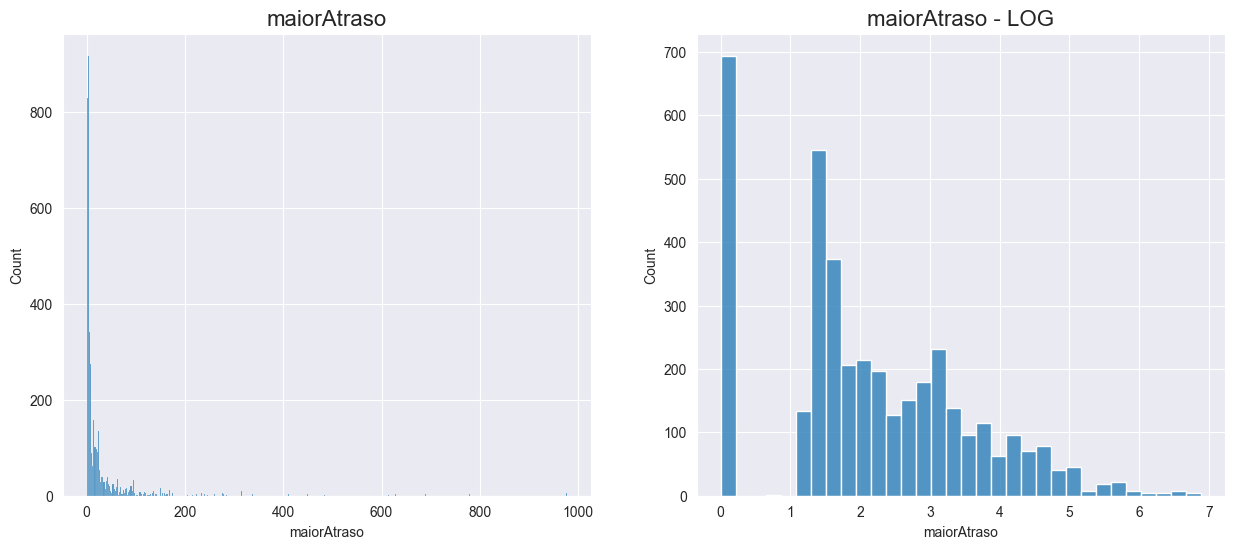

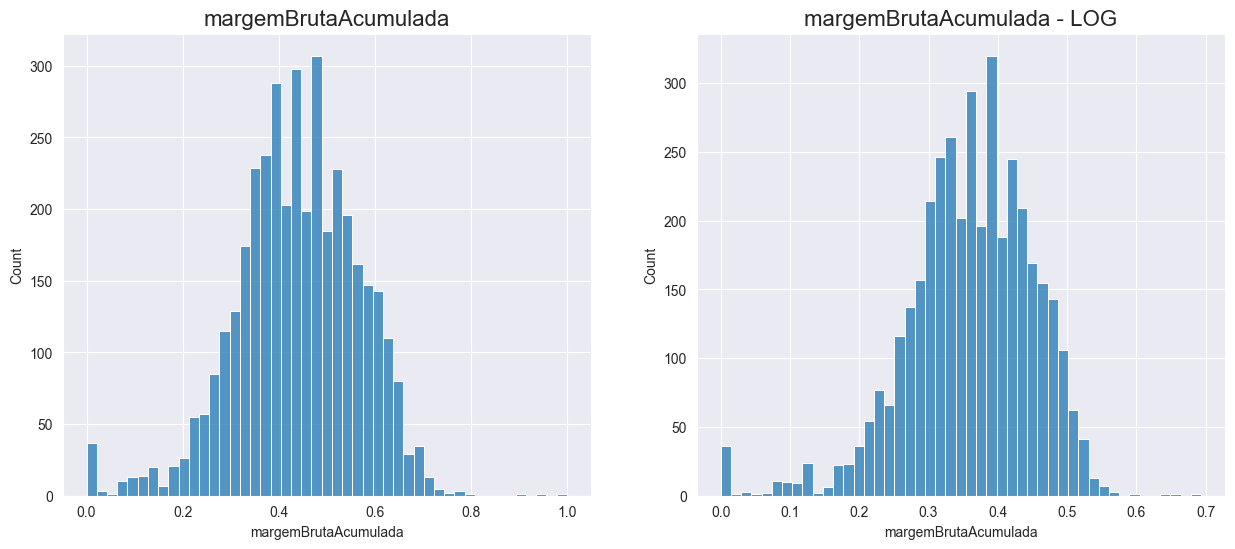

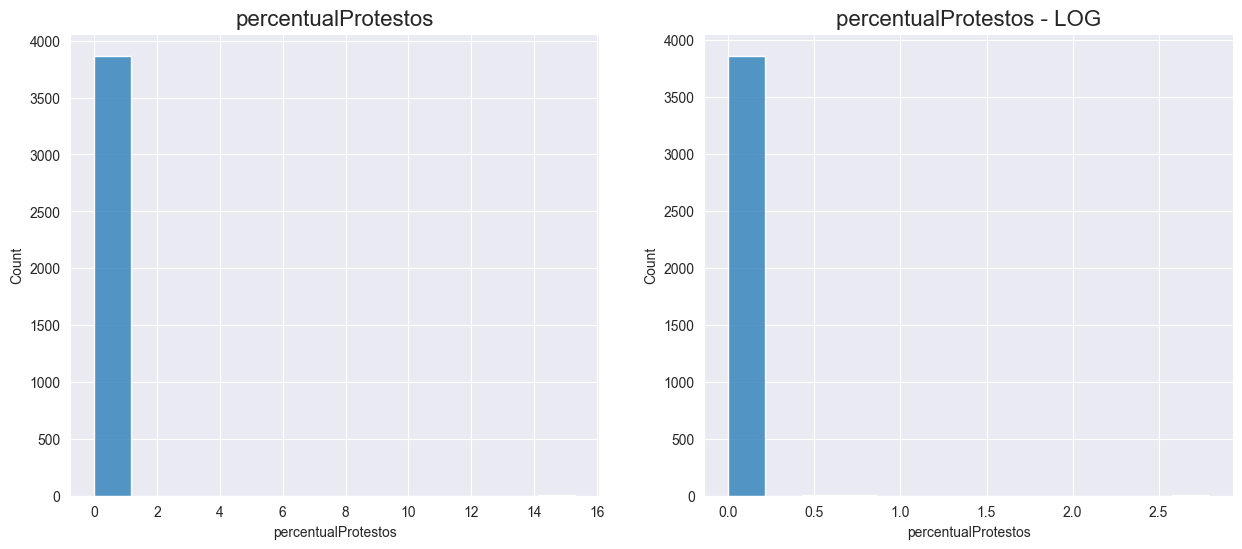

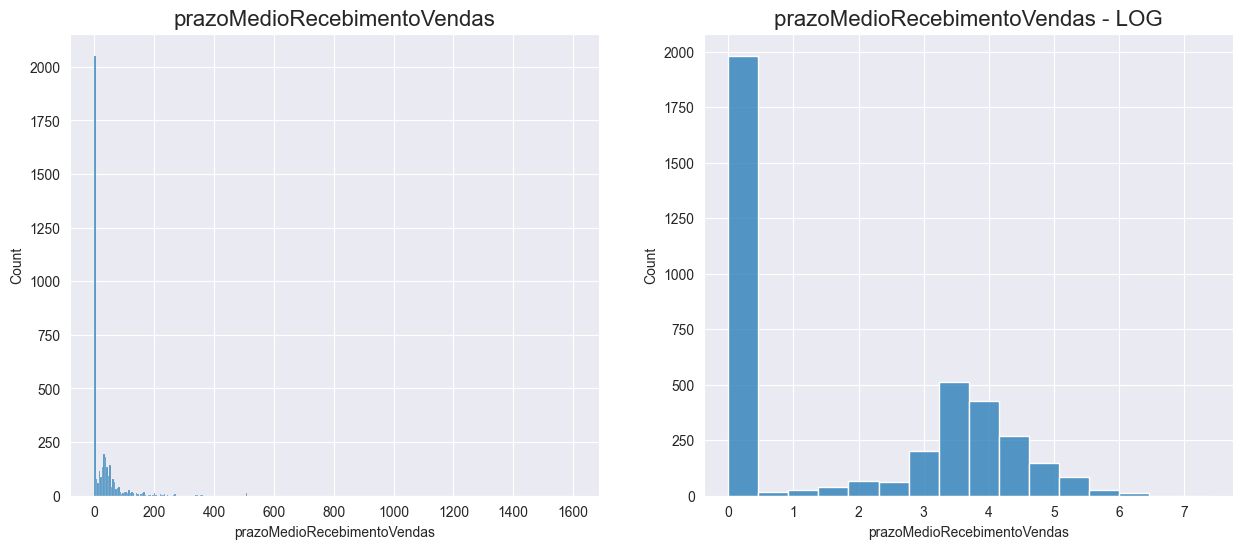

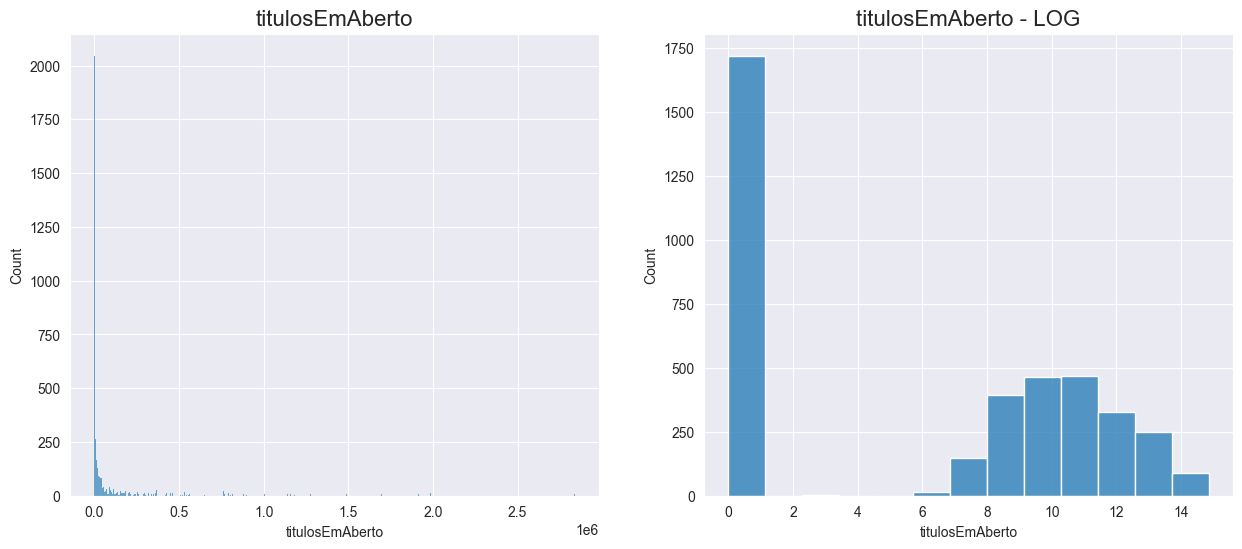

In [55]:
for column in columns_to_plot[0]:
    create_subplots(group_0_v2, column, column)

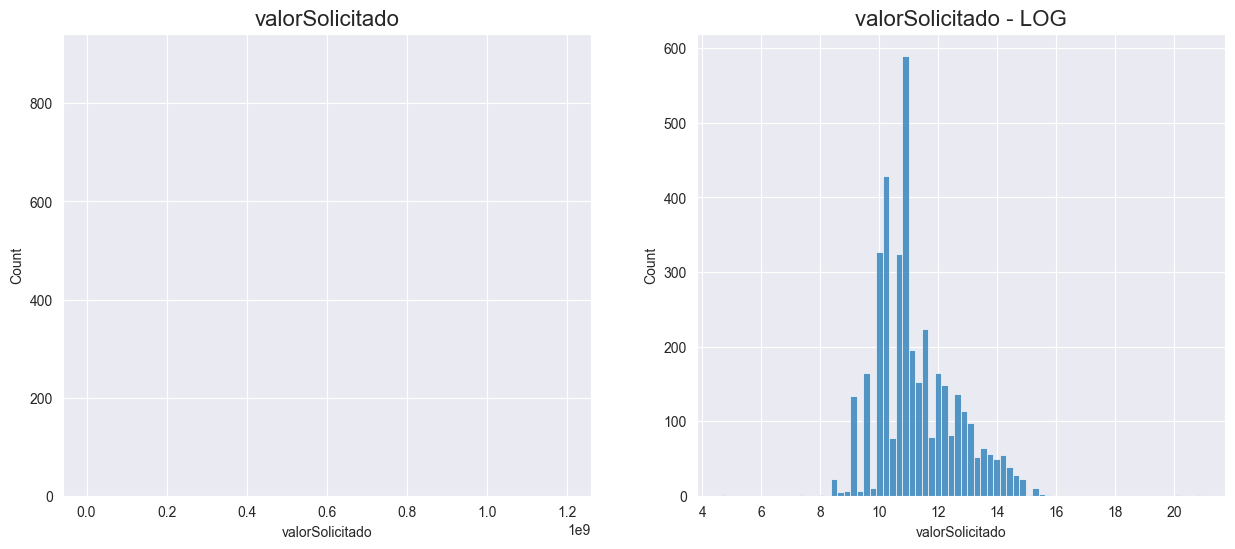

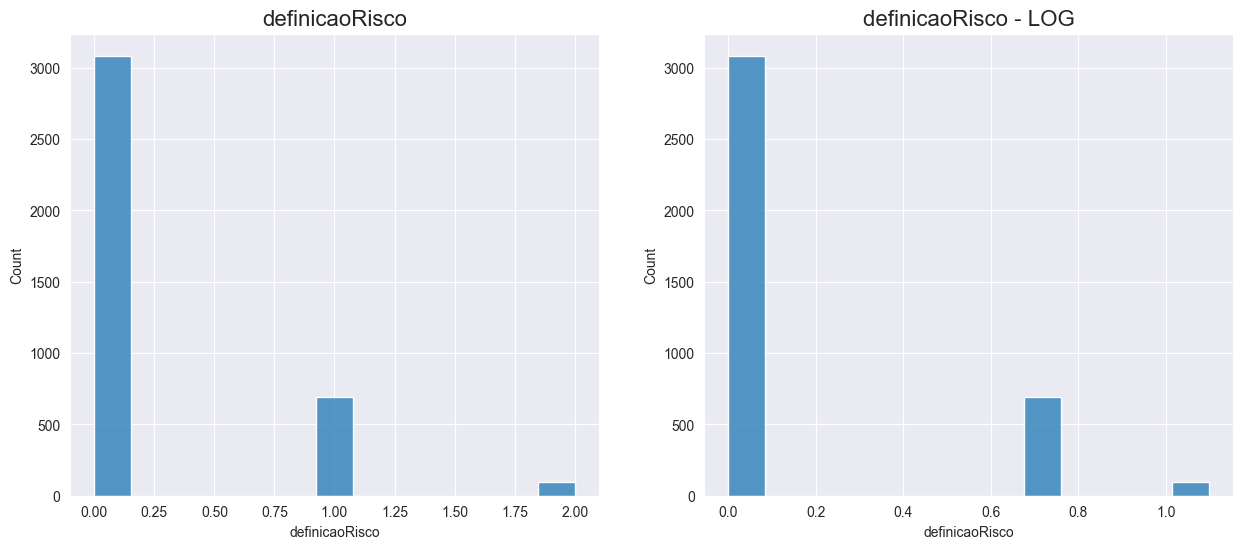

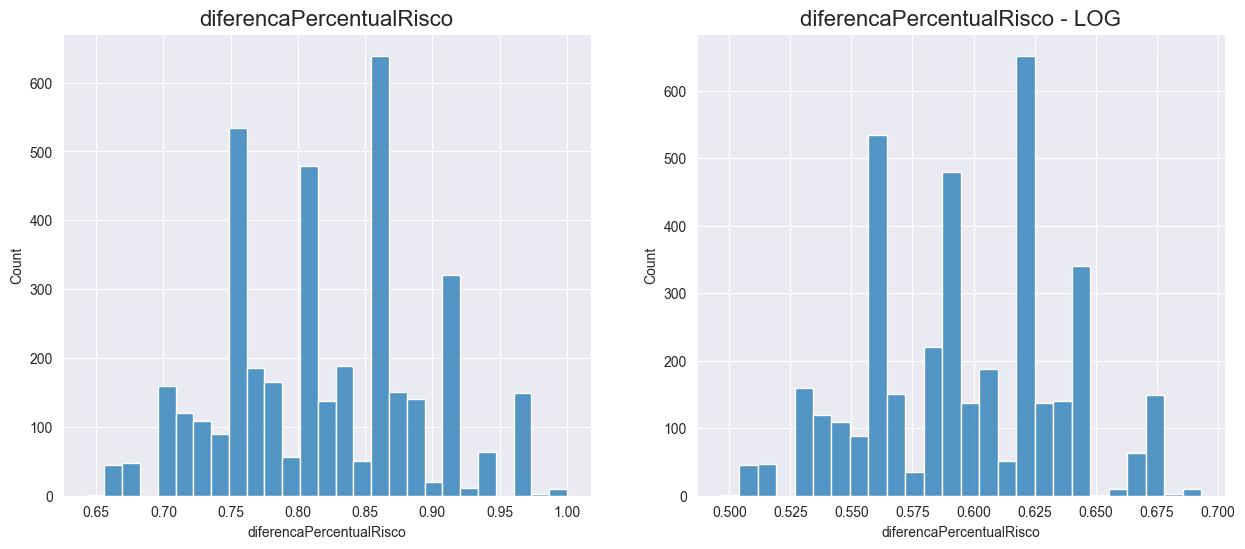

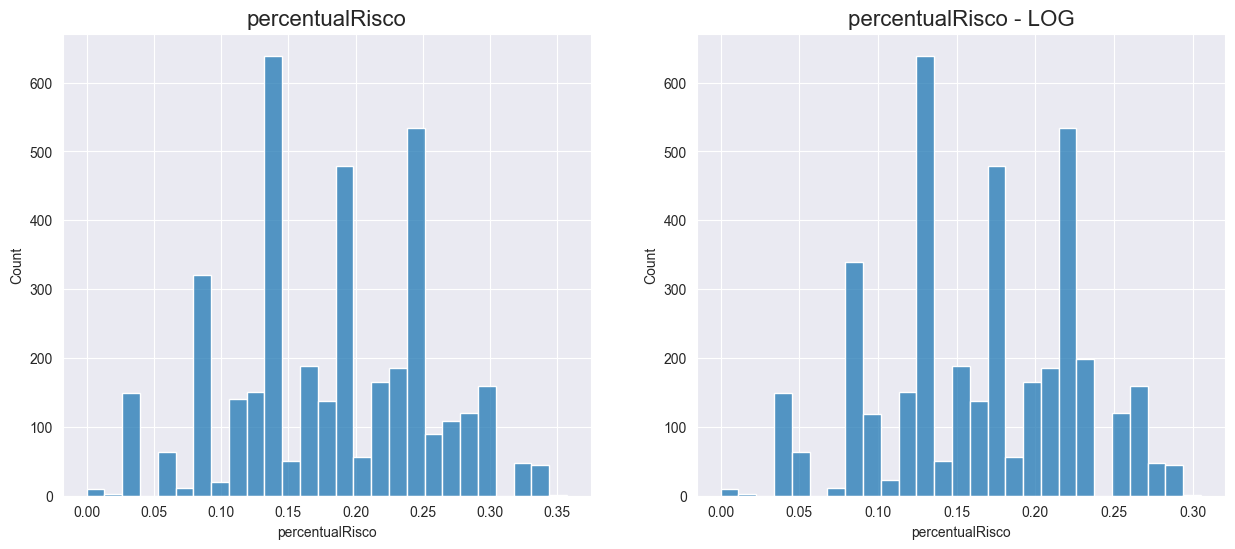

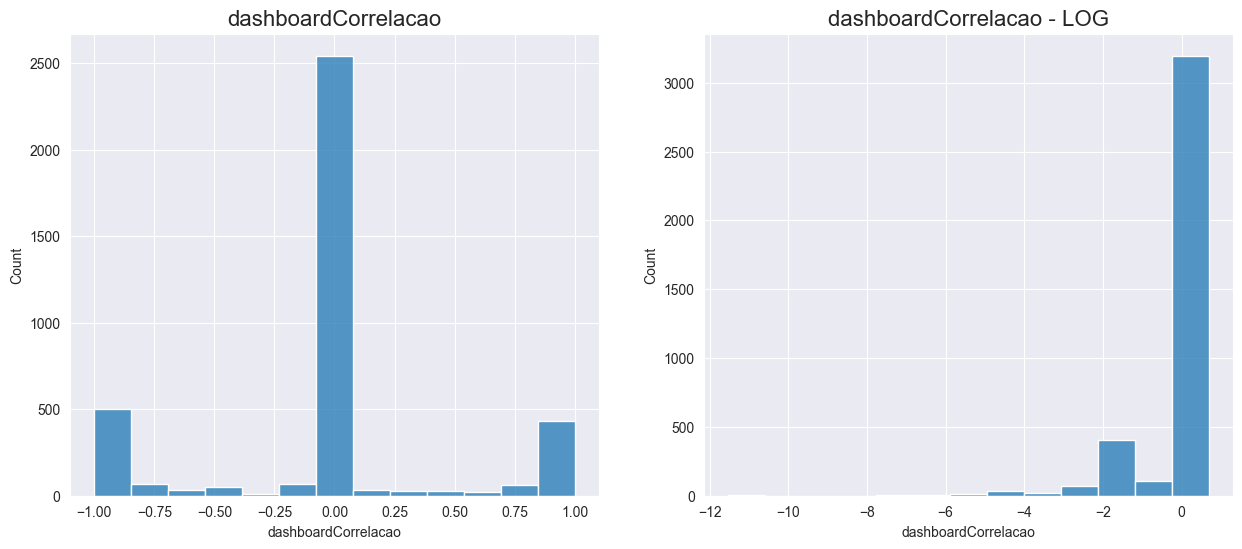

In [56]:
for column in columns_to_plot[1]:
    create_subplots(group_0_v2, column, column)

C:\Users\vinic\.conda\envs\gpu\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vinic\.conda\envs\gpu\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


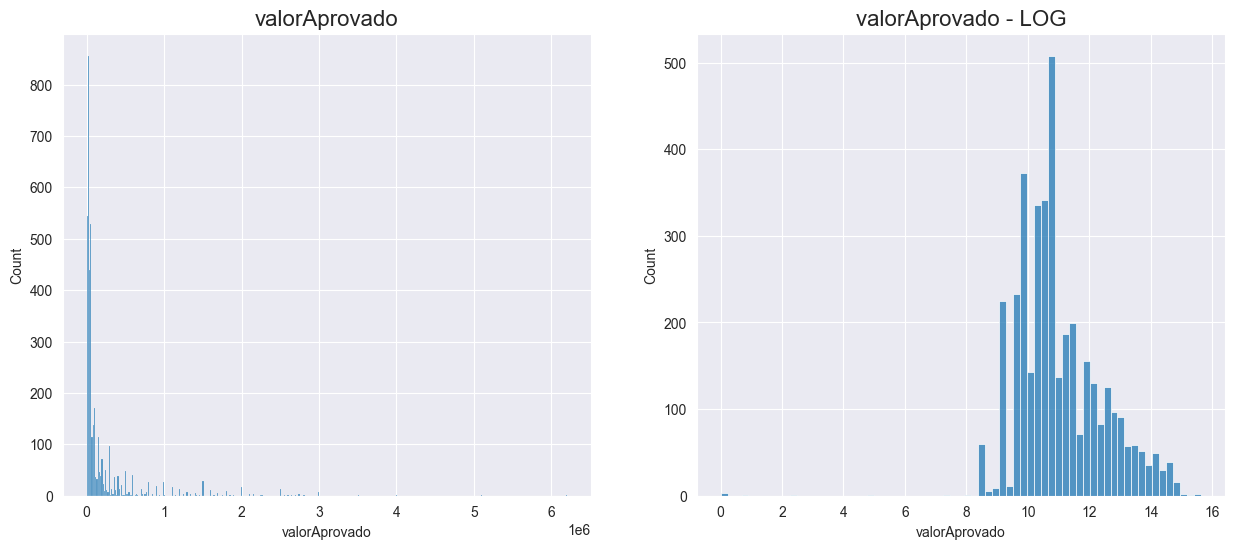

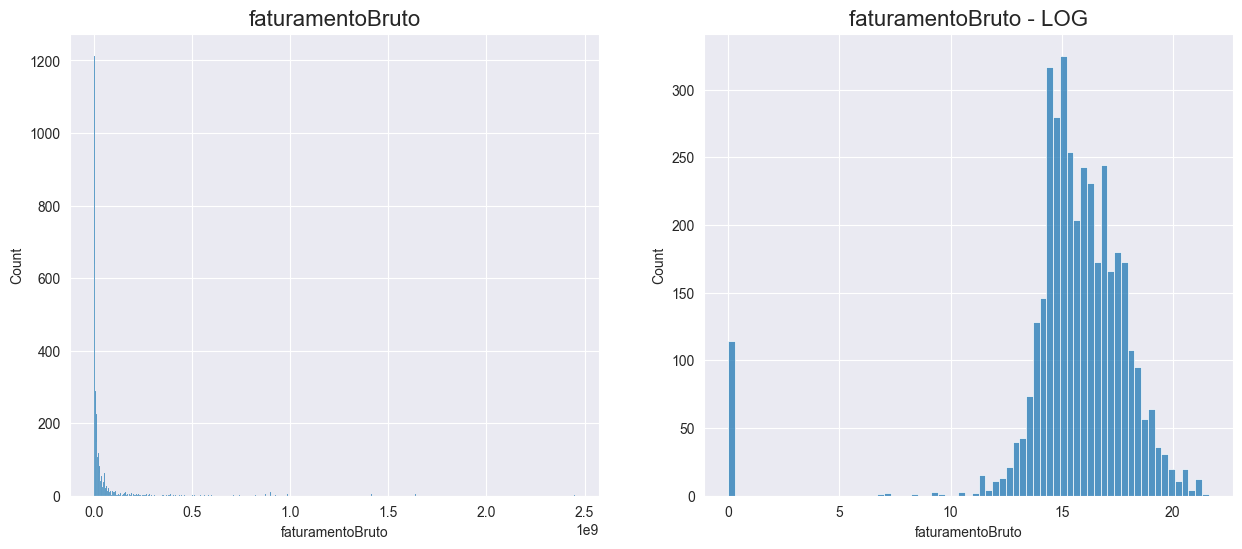

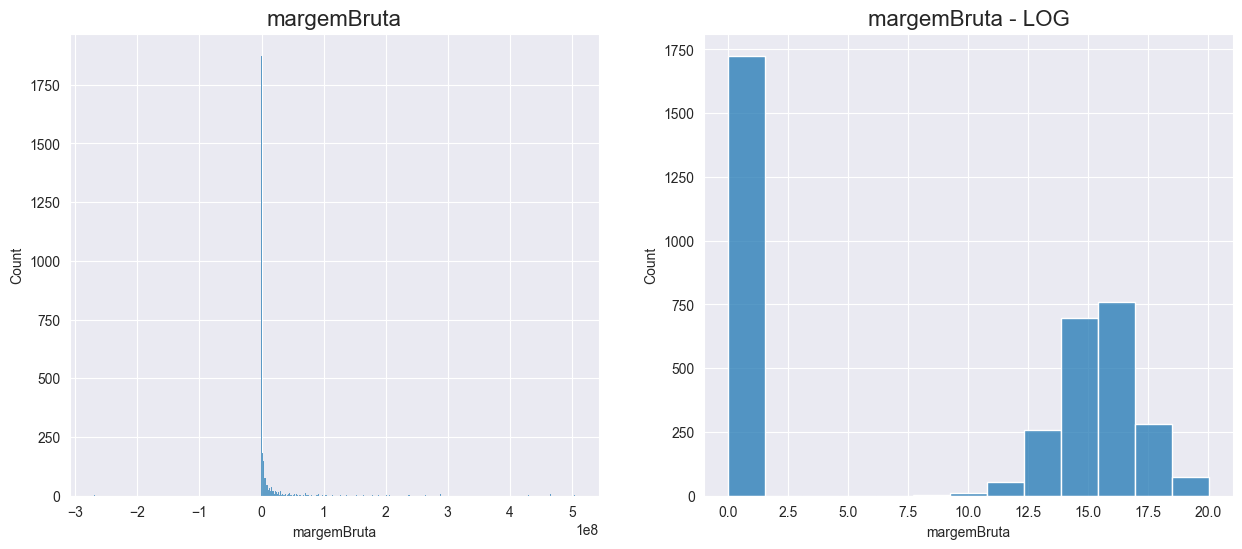

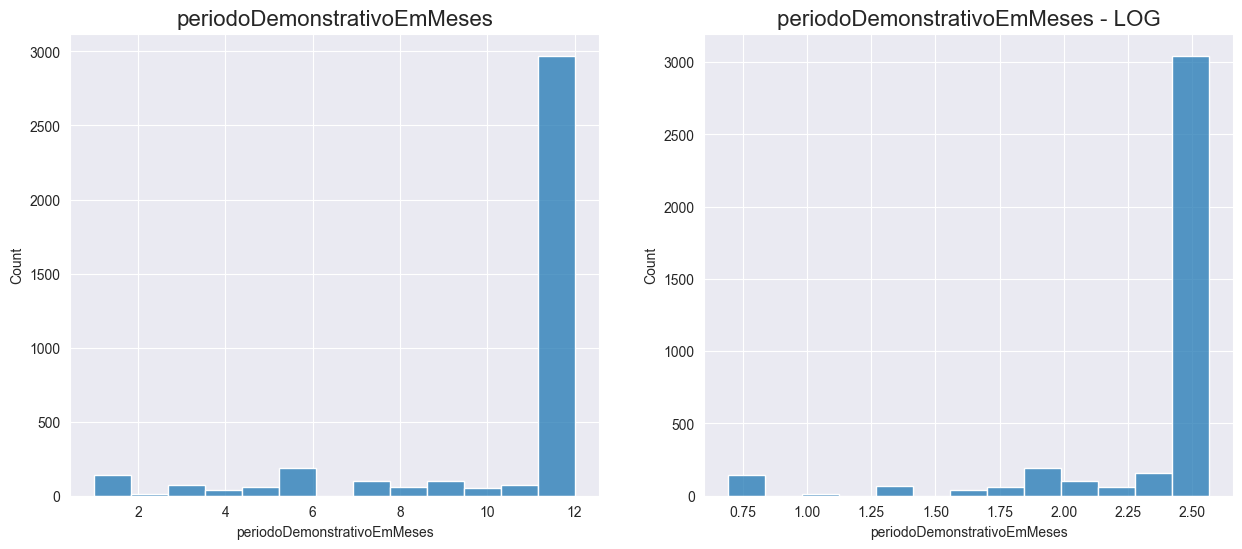

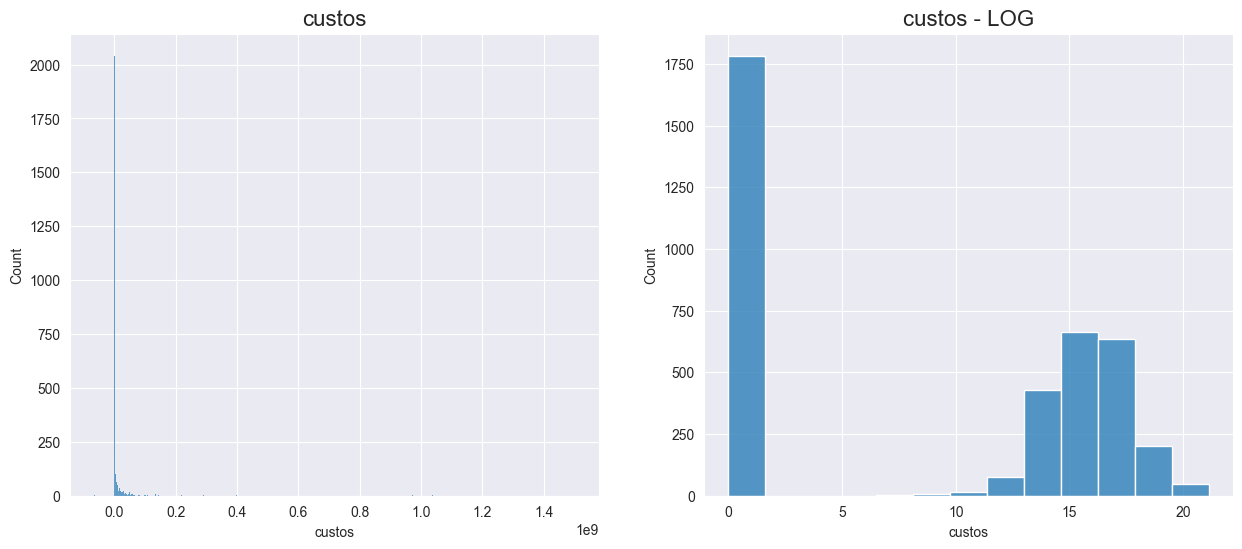

In [57]:
for column in columns_to_plot[2]:
    create_subplots(group_0_v2, column, column)

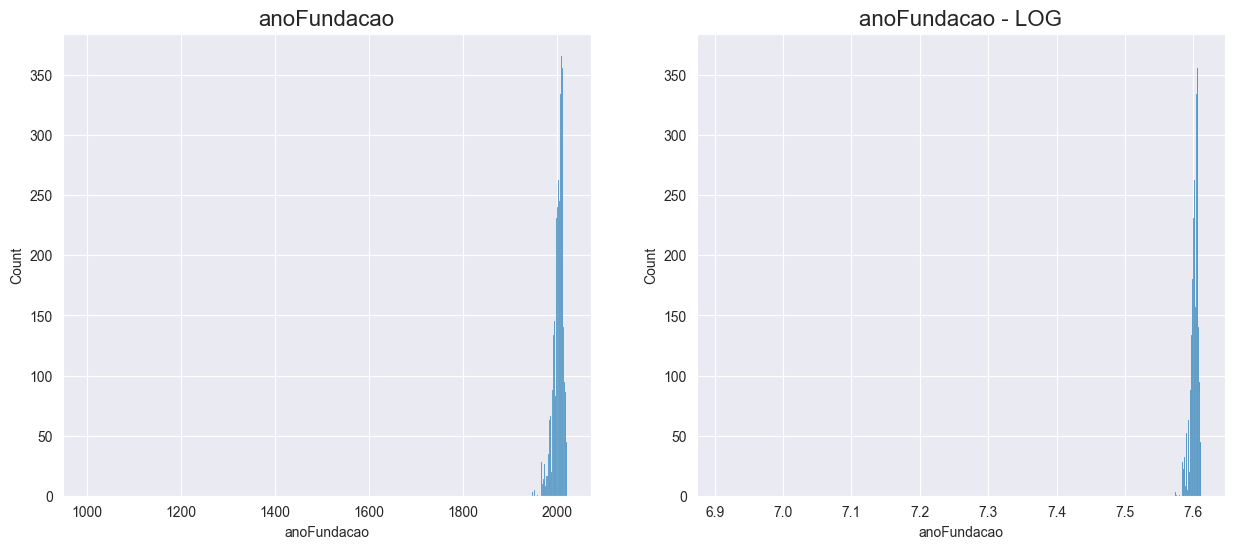

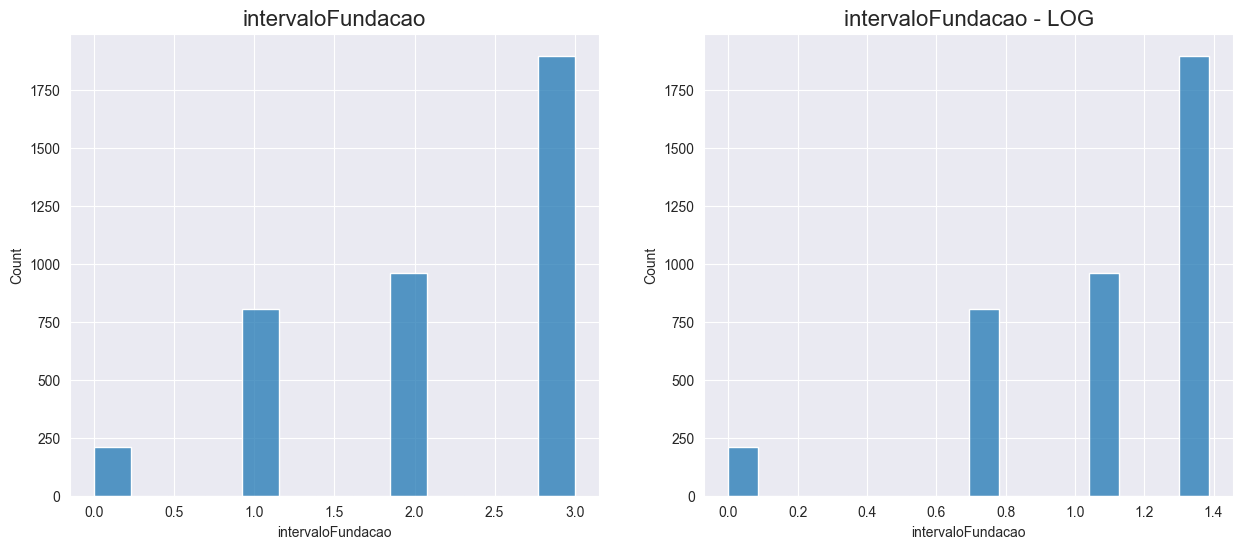

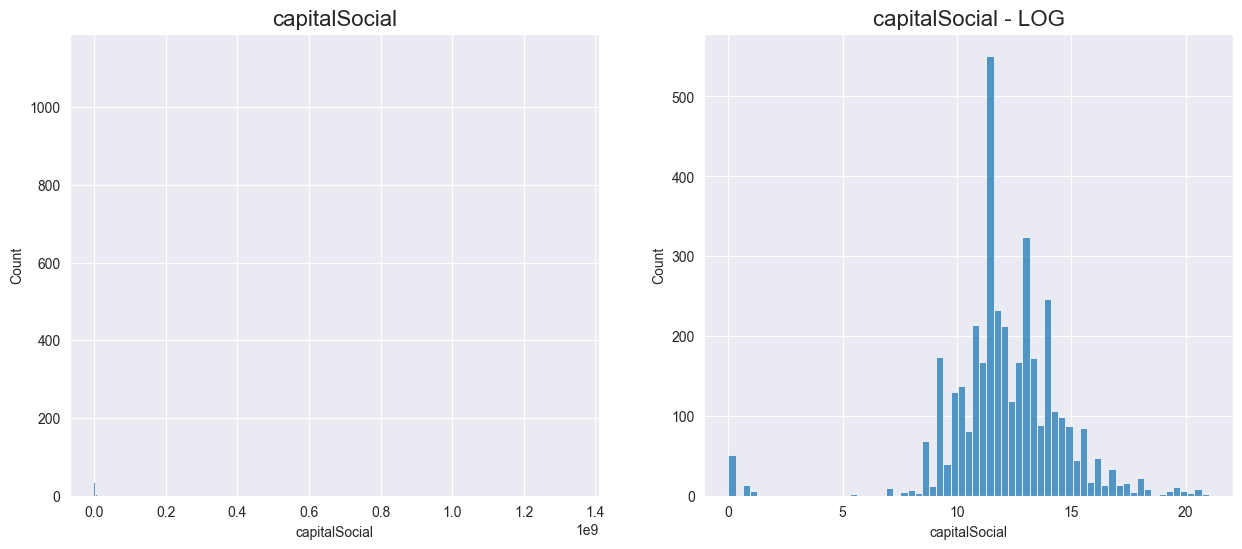

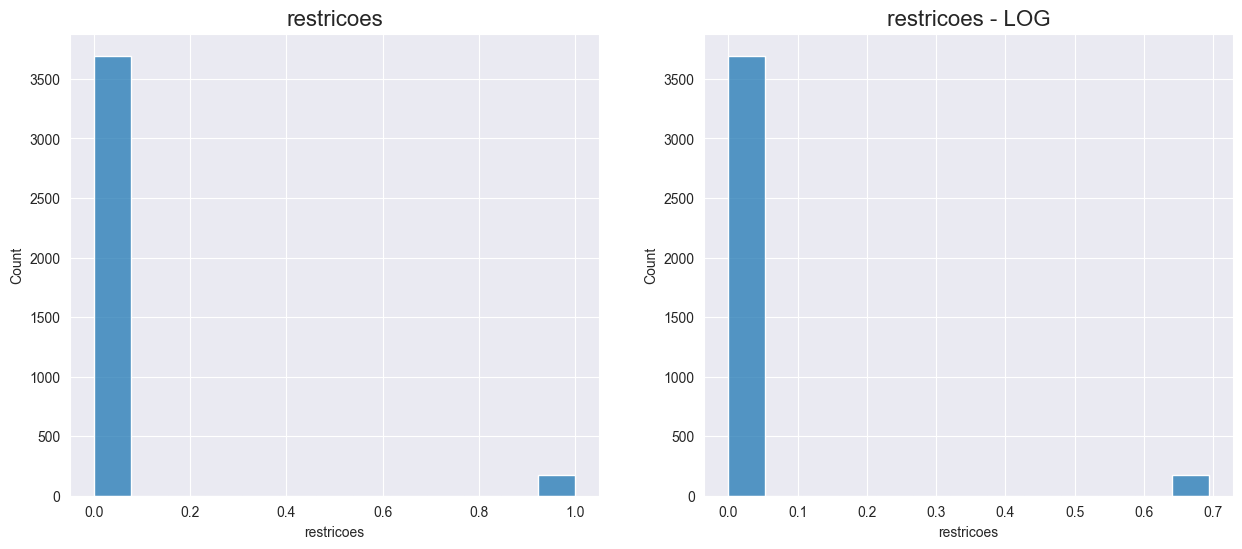

In [58]:
for column in columns_to_plot[3]:
    create_subplots(group_0_v2, column, column)

MemoryError: Unable to allocate 2.47 GiB for an array with shape (331255209,) and data type float64

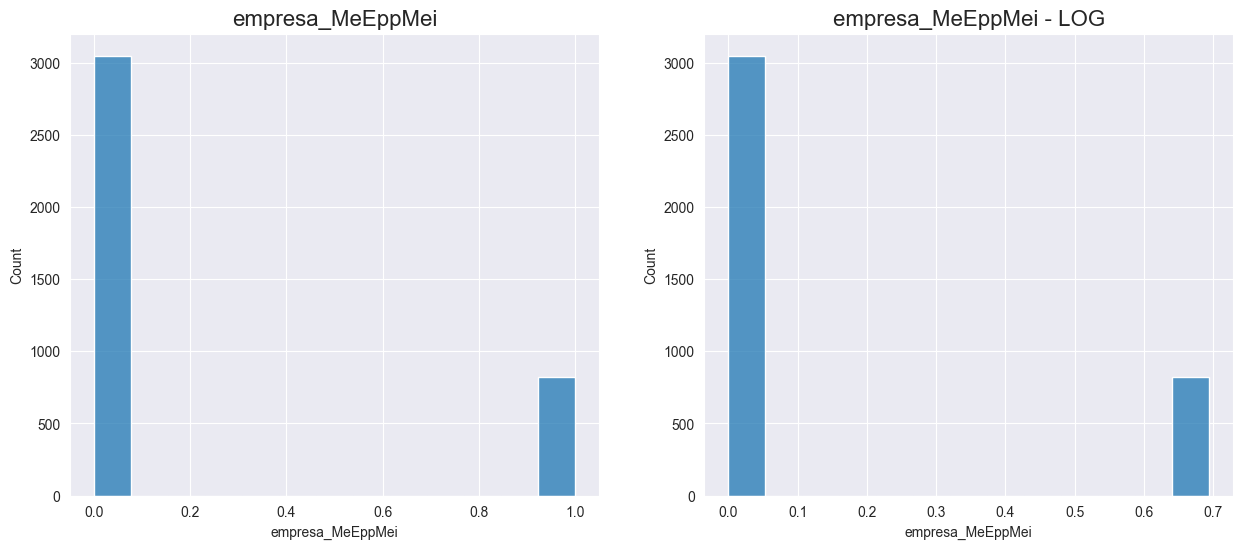

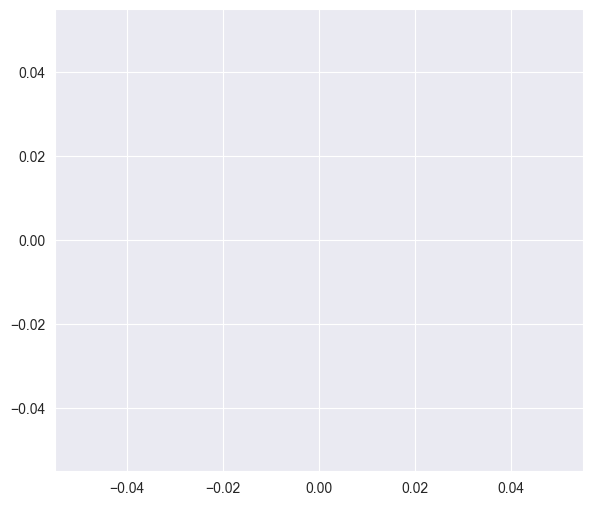

In [59]:
for column in columns_to_plot[4]:
    create_subplots(group_0_v2, column, column)

In [ ]:
# A distribuição das variáveis ficam muito mais próximas de uma distribuição normal 
#quando utilizado uma transformação logaritmica

### Analisando correlação das variáveis
df_group_0_correlation = group_0_v2.dropna()
df_group_0_correlation = df_group_0_correlation.corr()
## A partir disso vou criar um dataset transformado para analisar a correlacao
df_log_group_0_correlation = np.log(group_0_v2.copy().dropna())
df_log_group_0_correlation = df_log_group_0_correlation.corr()

In [ ]:
## Heatmap de correlações
plt.figure(figsize=(18, 15))
sns.heatmap(df_group_0_correlation, annot=True, cmap='coolwarm')
plt.title('Dataframe SEM transformação', fontdict={'fontsize': 28})

In [ ]:
## Heatmap de correlações
plt.figure(figsize=(18, 15))
sns.heatmap(df_log_group_0_correlation, annot=True, cmap='coolwarm')
plt.title('Dataframe COM transformação', fontdict={'fontsize': 28})

In [ ]:
## Com a transformação, foi possível encontrar muito mais correlações entre as features

# TODO: Realizar o mesmo processo sem outliers !!!
# TODO: Testar com uma série de combinações das features que são altamente correlacionadas